Nguyễn Ngọc Hà My - MSSV: 21522351

5. (Lập trình) Hãy thực hiện lại bài tập lập trình ở phần hướng dẫn chung nhưng thay
đổi các yêu cầu thành: <br>
a) Nước Đức ‘Germany’, min_sup = 5% và min_conf = 50%

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Câu 2

In [5]:
df['Description']=df['Description'].str.strip() #bỏ kí tự trống bằng strip()
df.dropna(axis=0,subset=['InvoiceNo'],inplace=True)
df['InvoiceNo']=df['InvoiceNo'].astype('str')

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


3. Trong dữ liệu đã cho, có một số hóa đơn là hóa đơn tín dụng thay vì là hóa đơn ghi nợ vì vậy hãy xóa những hóa đơn đó. Chúng được xác định với ký tự ‘C’ chứa trong số hóa đơn InvoiceNo.
Có thể xem một ví dụ về loại hóa đơn tín dụng bằng câu lệnh như sau

In [7]:
df[df.InvoiceNo.str.contains('C',na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Thống kê số dòng dữ liệu theo từng quốc gia, bằng câu lệnh sau và kết quả được thể hiện bằng biểu đồ

<Axes: ylabel='Country'>

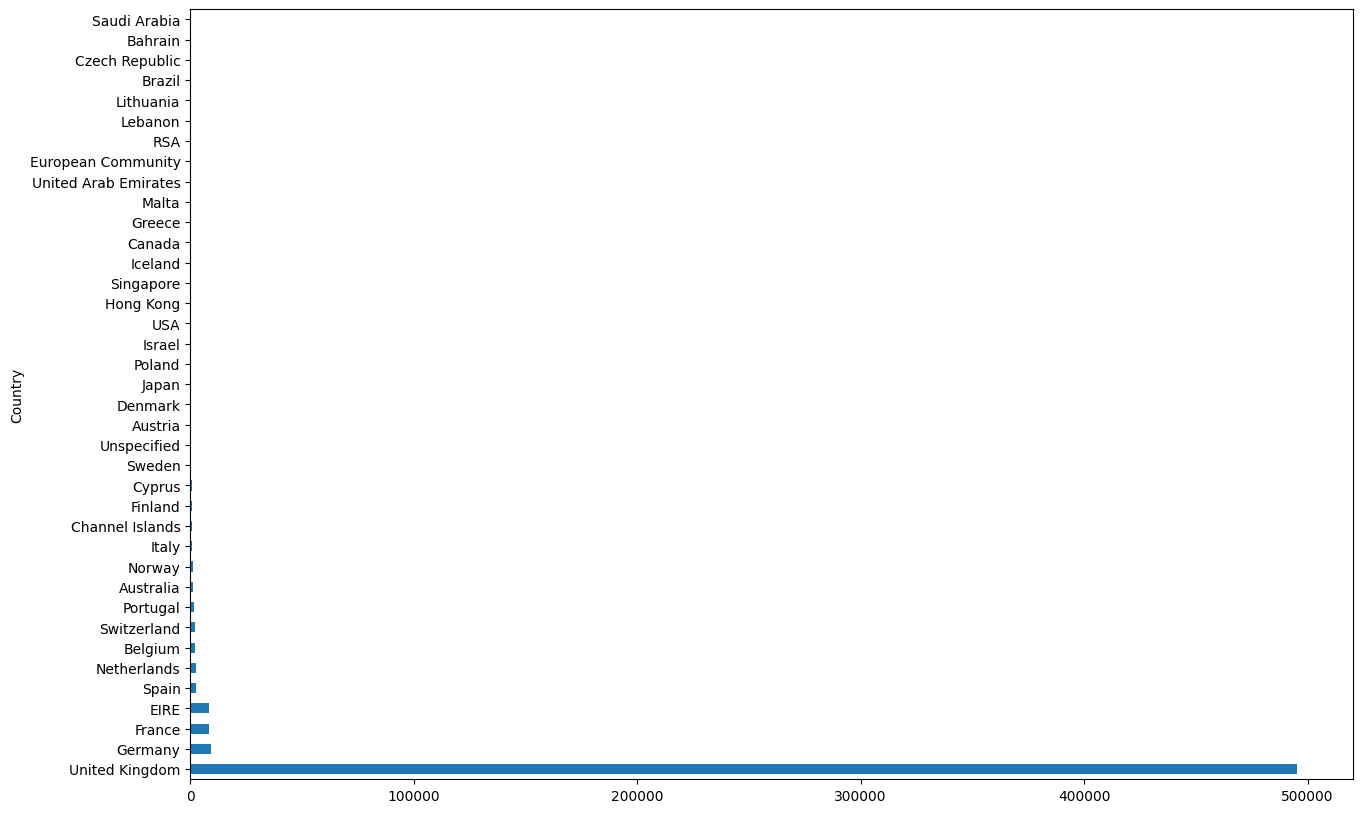

In [8]:
df['Country'].value_counts().plot(kind='barh',figsize=(15,10))

5. Lấy ra dữ liệu hóa đơn từ nước Anh ‘United Kingdom’ và gom nhóm cột Số lượng mua (Quantity) theo Số hóa đơn (InvoiceNo) và Tên mặt hàng (Description).
Chỉ xét các hóa đơn từ nước Anh và nhóm dữ liệu theo Số hóa đơn và Tên mặt hàng

In [9]:
basket = df[df['Country']=="Germany"].groupby(['InvoiceNo','Description'])['Quantity']

6. Chuyển đổi dữ liệu về dạng hot encoding, với mỗi dòng dữ liệu là một hóa đơn.
Chuyển đổi dữ liệu về dạng hot encoding, với mỗi dòng dữ liệu là một hóa đơn

In [10]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

Xem dữ liệu sau khi chuyển về dạng hot encoding

In [11]:
basket.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


7. Chuyển đổi dữ liệu từ dạng hot encoding thành one-hot encoding.
Tạo hàm biến đổi mỗi điểm dữ liệu có số lượng (Quantity) lớn hơn 0 thành 1

In [12]:
def encode_data(datapoint):
    if(datapoint)<=0:
        return 0
    if(datapoint)>=1:
        return 1

Chuyển đổi dữ liệu từ dạng hot encoding thành one-hot encoding

In [13]:
basket = basket.map(encode_data)

8. Do cột ‘POSTAGE’ là tiền cước phí trên mỗi hóa đơn nên cần xóa nó đi.
Xóa cột 'POSTAGE'

In [14]:
basket.drop('POSTAGE',inplace=True,axis=1)

9. Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 5%.
Áp dụng thuật toán Apriori với min_sup = 3% để tìm tập phổ biến

In [15]:
itemset = apriori(basket,min_support=0.05,use_colnames=True)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:
itemset.head(10)

,support,itemsets
0,0.077944,(6 RIBBONS RUSTIC CHARM)
1,0.053068,(ALARM CLOCK BAKELIKE PINK)
2,0.054726,(GUMBALL COAT RACK)
3,0.069652,(JAM MAKING SET PRINTED)
4,0.059701,(JUMBO BAG RED RETROSPOT)
5,0.076285,(JUMBO BAG WOODLAND ANIMALS)
6,0.059701,(LUNCH BAG WOODLAND)
7,0.064677,(PACK OF 72 RETROSPOT CAKE CASES)
8,0.087894,(PLASTERS IN TIN CIRCUS PARADE)
9,0.081260,(PLASTERS IN TIN SPACEBOY)


10. Tạo luật kết hợp với min_conf = 50% và in ra các luật này.
Tạo luật kết hợp với min_conf = 50%

In [17]:
rules = association_rules(itemset,metric="confidence",min_threshold=0.5)

Xem thông tin về tập luật

In [18]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         5 non-null      object 
 1   consequents         5 non-null      object 
 2   antecedent support  5 non-null      float64
 3   consequent support  5 non-null      float64
 4   support             5 non-null      float64
 5   confidence          5 non-null      float64
 6   lift                5 non-null      float64
 7   leverage            5 non-null      float64
 8   conviction          5 non-null      float64
 9   zhangs_metric       5 non-null      float64
dtypes: float64(8), object(2)
memory usage: 532.0+ bytes


Chuyển đổi vế trái và vế phải từ kiểu object (frozenset) về kiểu chuỗi (unicode)

In [19]:
rules["antecedents"]=rules["antecedents"].apply(lambda x:list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x:list(x)[0]).astype("unicode")

Viết lệnh in ra các luật đã tìm được

In [20]:
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],"==>",rules.loc[i,'consequents'],'[',rules.loc[i,'support'],',',rules.loc[i,'support'],']')

PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.05140961857379768 , 0.05140961857379768 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.05638474295190713 , 0.05638474295190713 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.09950248756218906 , 0.09950248756218906 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.09950248756218906 , 0.09950248756218906 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.05306799336650083 , 0.05306799336650083 ]


11. Biểu diễn độ tin cậy, độ hỗ trợ của tập luật lên đồ thị phân tán (scatter plot).
Lấy giá trị độ hỗ trợ và độ tin cậy của luật

In [21]:
support = rules['support'].values
confidence = rules['confidence'].values

Biểu diễn các thông tin này lên biểu đồ và kết quả thu được

<Axes: title={'center': 'Assocation Rules'}, xlabel='support', ylabel='confidence'>

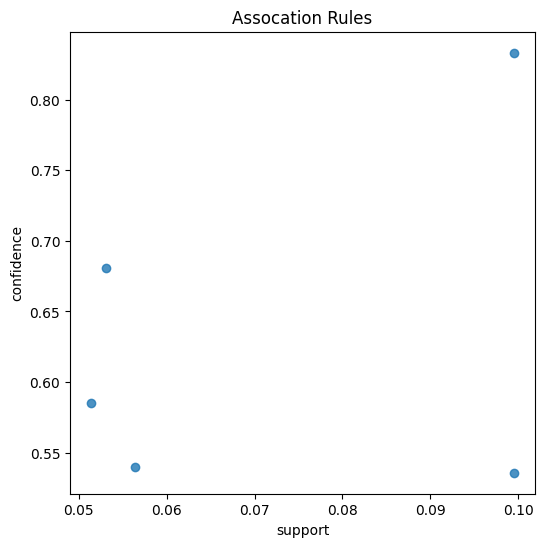

In [22]:
plt.figure(figsize=(6,6))
plt.title('Assocation Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence, fit_reg=False)

12. Tìm tập phổ biến và luật kết hợp bằng thuật toán FP-Growth với min_sup = 3%, min_conf = 50%. So sánh kết quả với thuật toán Apriori ở trên.


Import module fpgrowth từ thư viện mlxtend và thực hiện tìm tập phổ biến bằng thuật toán FP-Growth

In [23]:
from mlxtend.frequent_patterns import fpgrowth
itemsets = fpgrowth(basket, min_support=0.05, use_colnames=True)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Tạo luật kết hợp

In [24]:
rules = association_rules(itemset,metric="confidence",min_threshold=0.5)

Xem thông tin về tập luật

In [25]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         5 non-null      object 
 1   consequents         5 non-null      object 
 2   antecedent support  5 non-null      float64
 3   consequent support  5 non-null      float64
 4   support             5 non-null      float64
 5   confidence          5 non-null      float64
 6   lift                5 non-null      float64
 7   leverage            5 non-null      float64
 8   conviction          5 non-null      float64
 9   zhangs_metric       5 non-null      float64
dtypes: float64(8), object(2)
memory usage: 532.0+ bytes


Chuyển đổi vế trái và vế phải từ kiểu object (frozenset) về kiểu chuỗi (unicode)

In [26]:
rules["antecedents"]=rules["antecedents"].apply(lambda x:list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x:list(x)[0]).astype("unicode")

Viết lệnh in ra các luật đã tìm được

In [27]:
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],"==>",rules.loc[i,'consequents'],'[',rules.loc[i,'support'],',',rules.loc[i,'support'],']')

PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.05140961857379768 , 0.05140961857379768 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.05638474295190713 , 0.05638474295190713 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.09950248756218906 , 0.09950248756218906 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.09950248756218906 , 0.09950248756218906 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.05306799336650083 , 0.05306799336650083 ]


Lấy giá trị độ hỗ trợ và độ tin cậy của luật



In [28]:
support = rules['support'].values
confidence = rules['confidence'].values

Biểu diễn các thông tin này lên biểu đồ và kết quả thu được



<Axes: title={'center': 'Assocation Rules'}, xlabel='support', ylabel='confidence'>

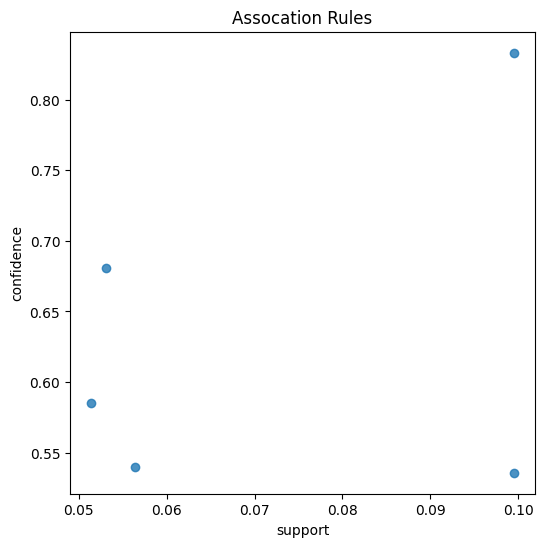

In [29]:
plt.figure(figsize=(6,6))
plt.title('Assocation Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence, fit_reg=False)

Kết luận: Hai thuộc tính này không tương quan. <br>
Kết quả giống với Apriori.